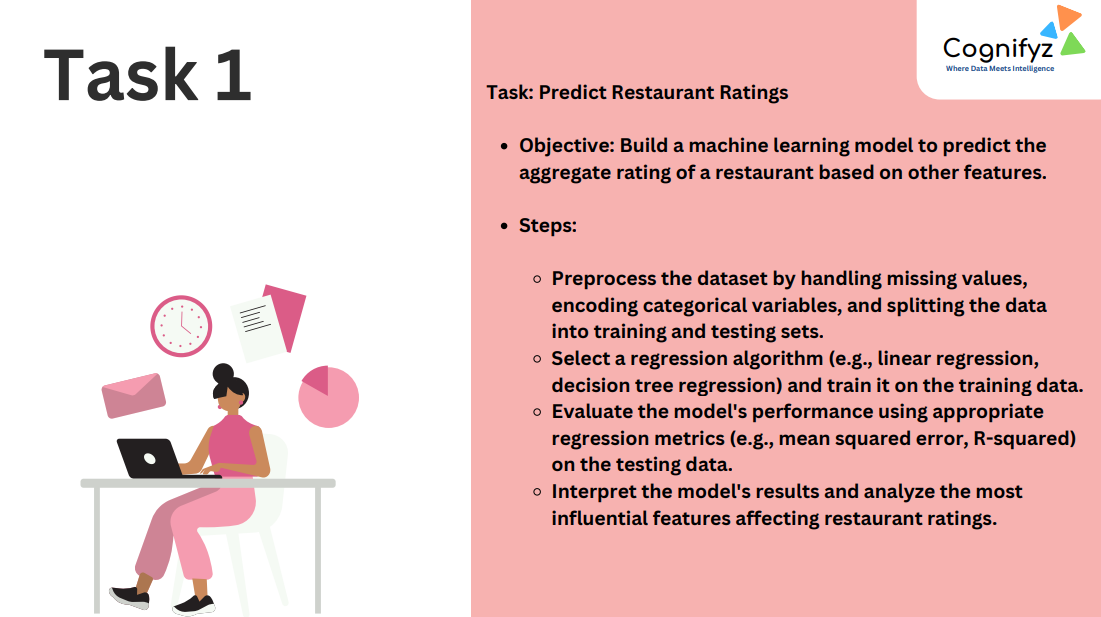

## Created by `Meet Parkin Jariwala`

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## Reading data from dataset

In [2]:
df = pd.read_csv('Dataset.csv')
df.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

### Information about data

## Description of Columns:

- `Restaurant ID` :- It is a unique code given to each restaurant.
- `Restaurant Name` :- Bascially this column contains the name of restaurant from which it can be identify.
- `Country Code` :- It is a integer code given to particular country.
- `City` :- City in the restaurant lies is been mention in this column.
- `Address` :- This column contains the Full Address of Restaurant from which customer can able to visit it.
- `Locality` :- This column contains the Famous nearby places from the restaurant can be easily searchable
- `Locality Verbose` :- This column contains Detail address of localities.
- `Longitude` :- It is a column that contains the geographical longitude of the restaurant.
- `Latitude` :- It is a column that contains the geographical latitude of the restaurant.
- `Cuisines` :- It is a column that contains a characteristic style of cooking practices and traditions.
- `Average cost of two` :- This is a informal column that contains the data regarding the cost if a couple visits the restaurant.
- `Currency` :- It is a column that contains a Currency accepted by the restaurant.
- `Has Table Booking` :- This column indicate that the restuarant has the online table booking system or not.
- `Has Online Delivery` :- This column indicate that the restuarant has feature of home delivery or not.
- `Is Delivering now` :- This column indicate that the Food item that can be avaiable at any time.
- `Switch to order menu` :- This column indicate that the Restaurant has the E-menu system or not.
- `Price Range` :- This column contains the relative range with respect to average price of food items.
- `Aggregate Rating` :- This column contains the rating from 0 to 5 given by the customers.
- `Rating color` :- It is a genernal rating that determines how better the food was? in form of creative colors.
- `Rating text` :- This column indicate the rating texts like Good,Average and many more.
- `votes` :- This column determins the number of vote given by visitors

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Checking for duplicated values

In [4]:
print(f"Duplicate values: {df.duplicated().sum()}")

Duplicate values: 0


## Checking for missing values

In [5]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

## Removing missing values

In [6]:
df_clean = df.dropna()
df_clean.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### (Rows, Columns) of the dataframe

In [7]:
df_clean.shape

(9542, 21)

## Converting different types of currency to Indian Currency (INR)

In [8]:
def cost_conversion(row, Currency, cost):
    
    if 'Dollar' in row[Currency]:
        return row[cost] * 83
    elif 'Pounds' in row[Currency]:
        return row[cost] * 104
    elif 'Brazilian Real' in row[Currency]:
        return row[cost] * 16
    elif 'Emirati Diram' in row[Currency]:
        return row[cost] * 23
    elif 'Rand' in row[Currency]:
        return row[cost] * 4.5
    elif 'NewZealand' in row[Currency]:
        return row[cost] * 51
    elif 'Turkish Lira' in row[Currency]:
        return row[cost] * 2.5
    elif 'Botswana Pula' in row[Currency]:
        return row[cost] * 6
    elif 'Indonesian Rupiah' in row[Currency]:
        return row[cost] * 0.005
    elif 'Qatari Rial' in row[Currency]:
        return row[cost] * 23
    elif 'Sri Lankan Rupee' in row[Currency]:
        return row[cost] * 0.23
    else:
        return row[cost]


In [9]:
temp = df_clean[['Currency','Average Cost for two']].apply(cost_conversion, axis = 1, args=('Currency','Average Cost for two'))

## Creating a new column `Average Cost for two in rupees`.

In [10]:
df_clean.insert(12,'Average Cost for two in rupees',temp)
df_clean.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Average Cost for two in rupees  \
0        French, Japanese, Desserts  ...                          6600.0   
1                          Japanese  ...                          7200.0   
2  Seafood, Asian, Filipino, Indian  ...                         24000.0   
3                   Japanese, Sushi  ...                          9000.0   
4                  Japanese, Korean  ...                          9000.0   

  Has Table booking  Has Online delivery Is delivering now  \
0               Yes                   No                No   
1               Yes                   No                No   
2               Yes                   No                No   
3                No                   No                No   
4               Yes                   No                No   

  Switch to order menu Price range Aggregate rating  Rating color  \
0                   No           3              4.8    Dark Green   
1                   No           3              4.5    Dark Green   
2                   No           4              4.4         Green   
3                   No           4              4.9    Dark Green   
4                   No           4              4.8    Dark Green   

   Rating text Votes  
0    Excellent   314  
1    Excellent   591  
2    Very Good   270  
3    Excellent   365  
4    Excellent   229  

[5 rows x 22 columns]

## Dropping the original `Average Cost for two` column

In [11]:
df_clean.drop(columns='Average Cost for two', axis=1, inplace=True)
df_clean.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ... Average Cost for two in rupees  \
0        French, Japanese, Desserts  ...                         6600.0   
1                          Japanese  ...                         7200.0   
2  Seafood, Asian, Filipino, Indian  ...                        24000.0   
3                   Japanese, Sushi  ...                         9000.0   
4                  Japanese, Korean  ...                         9000.0   

   Has Table booking Has Online delivery Is delivering now  \
0                Yes                  No                No   
1                Yes                  No                No   
2                Yes                  No                No   
3                 No                  No                No   
4                Yes                  No                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           3               4.8    Dark Green   
1                   No           3               4.5    Dark Green   
2                   No           4               4.4         Green   
3                   No           4               4.9    Dark Green   
4                   No           4               4.8    Dark Green   

  Rating text Votes  
0   Excellent   314  
1   Excellent   591  
2   Very Good   270  
3   Excellent   365  
4   Excellent   229  

[5 rows x 21 columns]

## Handling Outliers

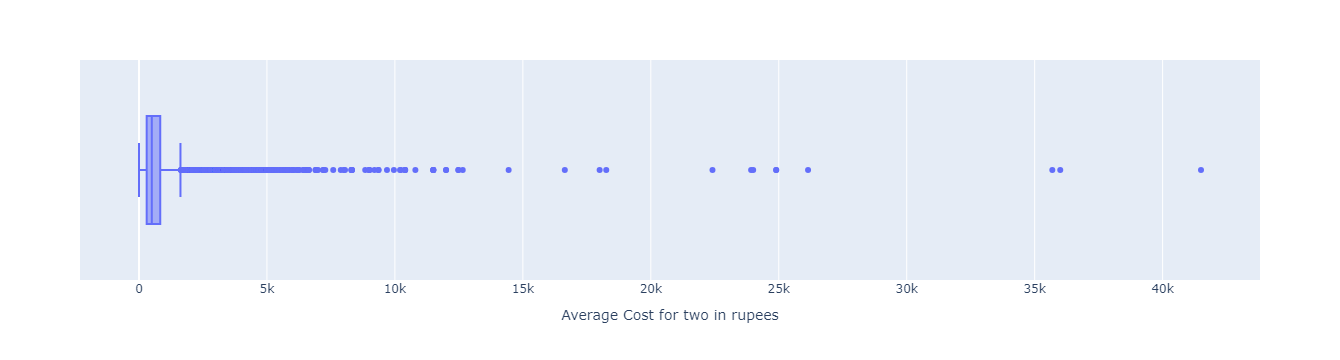

In [12]:
px.box(data_frame=df_clean, x='Average Cost for two in rupees')

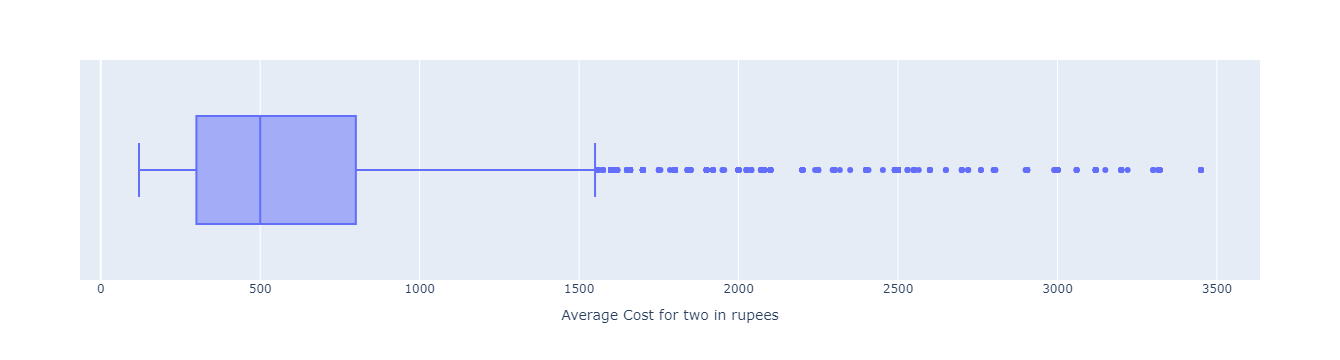

In [13]:
df_clean = df_clean[~(df_clean['Average Cost for two in rupees']>=3500)]
df_clean = df_clean[~(df_clean['Average Cost for two in rupees']<=100)]
px.box(data_frame=df_clean, x='Average Cost for two in rupees')

#### Removed outliers fron `Average Cost for two in rupees` 

## Encoding Categorical values to numeric values

- Encoding `Has Table booking`, `Has Online delivery`, `Is delivering now` using OneHot Encoding

In [14]:
encoder = OneHotEncoder()
categorical_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now']
encoded = encoder.fit_transform(df_clean[categorical_cols])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
encoded_df.head()

Has Table booking_No  Has Table booking_Yes  Has Online delivery_No  \
0                   1.0                    0.0                     1.0   
1                   1.0                    0.0                     1.0   
2                   1.0                    0.0                     1.0   
3                   1.0                    0.0                     1.0   
4                   1.0                    0.0                     1.0   

   Has Online delivery_Yes  Is delivering now_No  Is delivering now_Yes  
0                      0.0                   1.0                    0.0  
1                      0.0                   1.0                    0.0  
2                      0.0                   1.0                    0.0  
3                      0.0                   1.0                    0.0  
4                      0.0                   1.0                    0.0

In [15]:
df_clean= pd.concat([df_clean, encoded_df], axis=1).reset_index(drop=True)

In [16]:
df_clean.dropna(inplace=True)
df_clean.drop(columns=['Has Table booking', 'Has Online delivery'], axis=1, inplace=True)
df_clean.head(5)

Restaurant ID           Restaurant Name  Country Code       City  \
0      6600681.0               Chez Michou          30.0  Bras�_lia   
1      6601005.0       Caf�� Daniel Briand          30.0  Bras�_lia   
2      6600292.0  Casa do Biscoito Mineiro          30.0  Bras�_lia   
3      6600441.0                     Maori          30.0  Bras�_lia   
4      6600970.0            Pizza �� Bessa          30.0  Bras�_lia   

                                             Address   Locality  \
0  SCLN, 208, Bloco A, Loja 30, Asa Norte, Bras�_lia  Asa Norte   
1   SCLN 104, Bloco A, Loja 26, Asa Norte, Bras�_lia  Asa Norte   
2  SCLN 210, Bloco D, Loja 36/48, Asa Norte, Bras...  Asa Norte   
3    CLN 110, Bloco D, Loja 28, Asa Norte, Bras�_lia  Asa Norte   
4      SCS 214, Bloco C, Loja 40, Asa Sul, Bras�_lia    Asa Sul   

       Locality Verbose  Longitude   Latitude           Cuisines  ...  \
0  Asa Norte, Bras�_lia -47.881789 -15.764142  Fast Food, French  ...   
1  Asa Norte, Bras�_lia -47.882667 -15.777500               Cafe  ...   
2  Asa Norte, Bras�_lia -47.882136 -15.757472             Bakery  ...   
3  Asa Norte, Bras�_lia -47.888167 -15.758833          Brazilian  ...   
4    Asa Sul, Bras�_lia -47.915667 -15.831167              Pizza  ...   

  Aggregate rating  Rating color Rating text Votes  Has Table booking_No  \
0              3.0        Orange     Average   6.0                   1.0   
1              3.8        Yellow        Good   9.0                   1.0   
2              3.7        Yellow        Good  11.0                   1.0   
3              3.8        Yellow        Good  11.0                   1.0   
4              3.2        Orange     Average  11.0                   1.0   

   Has Table booking_Yes Has Online delivery_No Has Online delivery_Yes  \
0                    0.0                    1.0                     0.0   
1                    0.0                    1.0                     0.0   
2                    0.0                    1.0                     0.0   
3                    0.0                    1.0                     0.0   
4                    0.0                    1.0                     0.0   

   Is delivering now_No  Is delivering now_Yes  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   1.0                    0.0  
4                   1.0                    0.0  

[5 rows x 25 columns]

## Counting of different types of cuisines

In [17]:
df_clean['Cuisines']

0                         Fast Food, French
1                                      Cafe
2                                    Bakery
3                                 Brazilian
4                                     Pizza
                       ...                 
8365    North Indian, Chinese, South Indian
8366         North Indian, Mughlai, Chinese
8367                                 Bakery
8368                                Chinese
8369                                Chinese
Name: Cuisines, Length: 8370, dtype: object

- Creating a new column `Cuisines count` where number of cuisines each restaurant have are stored

In [18]:
df_clean['Cuisines count'] = df_clean['Cuisines'].str.split(', ').str.len()

## Taking input features

In [19]:
X = df_clean.drop(columns=[
        'Restaurant ID', 'Restaurant Name', 'City', 'Address',
        'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency', 'Is delivering now',
        'Switch to order menu',
        'Aggregate rating', 'Rating color', 'Rating text'], axis=1)

## Ordinal Encoding
- Priority wise encoding is done for `Rating color` and `Rating text`
  
- For `Rating color`:
    - From white to Dark Green priority increases
    - White - Lowest Priority
    - Dark Green - Highest Priority

- For `Rating text`:
    - From Not rated to Excellent priority increases
    - Not rated - Lowest Priority
    - Excellent - Highest Priority

In [20]:
cat1 = ['White', 'Red', 'Orange', 'Yellow', 'Green', 'Dark Green']
cat2 = ['Not rated', 'Poor', 'Average', 'Good', 'Very Good', 'Excellent']

encoder = OrdinalEncoder(categories=[cat1, cat2])
encoded = encoder.fit_transform(df_clean[['Rating color', 'Rating text']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X = pd.concat([X, encoded_df], axis=1)

## Input Features

In [21]:
X.head()

Country Code  Average Cost for two in rupees  Price range  Votes  \
0          30.0                           880.0          2.0    6.0   
1          30.0                           480.0          1.0    9.0   
2          30.0                           720.0          2.0   11.0   
3          30.0                           960.0          3.0   11.0   
4          30.0                           800.0          2.0   11.0   

   Has Table booking_No  Has Table booking_Yes  Has Online delivery_No  \
0                   1.0                    0.0                     1.0   
1                   1.0                    0.0                     1.0   
2                   1.0                    0.0                     1.0   
3                   1.0                    0.0                     1.0   
4                   1.0                    0.0                     1.0   

   Has Online delivery_Yes  Is delivering now_No  Is delivering now_Yes  \
0                      0.0                   1.0                    0.0   
1                      0.0                   1.0                    0.0   
2                      0.0                   1.0                    0.0   
3                      0.0                   1.0                    0.0   
4                      0.0                   1.0                    0.0   

   Cuisines count  Rating color  Rating text  
0               2           2.0          2.0  
1               1           3.0          3.0  
2               1           3.0          3.0  
3               1           3.0          3.0  
4               1           2.0          2.0

## Target Variable

In [22]:
y = df_clean[['Aggregate rating']]
y.head()

Aggregate rating
0               3.0
1               3.8
2               3.7
3               3.8
4               3.2

## Dividing dataset into training and testing dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6277, 13), (2093, 13), (6277, 1), (2093, 1))

### Function for calculating `mean squared error`, `mean absolute error`, `root mean squared error` and `r2 score`

In [25]:
def error_and_r2score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
    
    score = r2_score(y_test, y_pred)
    
    print(f"R2 Score: {score}")

## Decision Tree Regression Model

In [26]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
error_and_r2score(y_test, dtree_pred)

Mean Squared Error: 0.05857822982991571
Mean Absolute Error: 0.15175346392737699
Root Mean Squared Error: 0.2420293986893239
R2 Score: 0.9744931021950385


## Standardization for Linear Regression Model

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression Model

In [28]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
y_pred_test = regression.predict(X_test_scaled)
error_and_r2score(y_test, y_pred_test)

Mean Squared Error: 0.21945297294932956
Mean Absolute Error: 0.3987598411007716
Root Mean Squared Error: 0.46845808024766694
R2 Score: 0.9044429206845908


## Random Forest Regression Model

In [29]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred_test = regr.predict(X_test)
error_and_r2score(y_test, y_pred_test)

Mean Squared Error: 0.03527124246606073
Mean Absolute Error: 0.12610154773236135
Root Mean Squared Error: 0.1878063962330909
R2 Score: 0.9846417349986842


## Feature Importances

In [30]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': regr.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importances)

Feature Importances:
                           Feature  Importance
12                     Rating text    0.346044
3                            Votes    0.331081
11                    Rating color    0.315439
1   Average Cost for two in rupees    0.003533
10                  Cuisines count    0.001871
7          Has Online delivery_Yes    0.000462
2                      Price range    0.000452
6           Has Online delivery_No    0.000439
4             Has Table booking_No    0.000275
5            Has Table booking_Yes    0.000274
0                     Country Code    0.000098
9            Is delivering now_Yes    0.000016
8             Is delivering now_No    0.000014


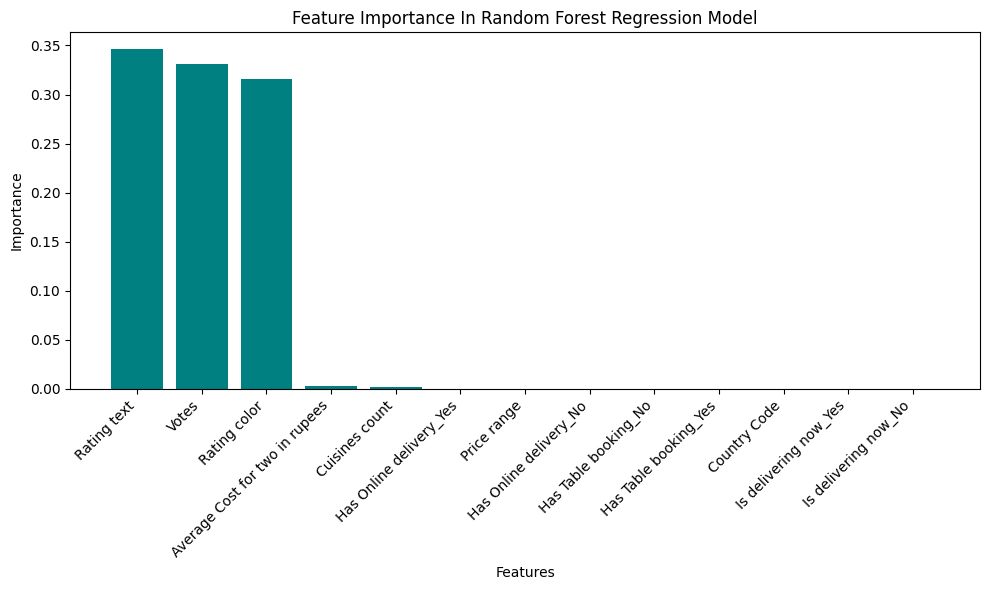

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(importances['Feature'], importances['Importance'], color='teal')
plt.title('Feature Importance In Random Forest Regression Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CONCLUSION:
### Best Model:- `Random Forest Regressor`
### R2 Score:- 0.9847

## Important Feature Identification Using Correlation 

<Axes: >

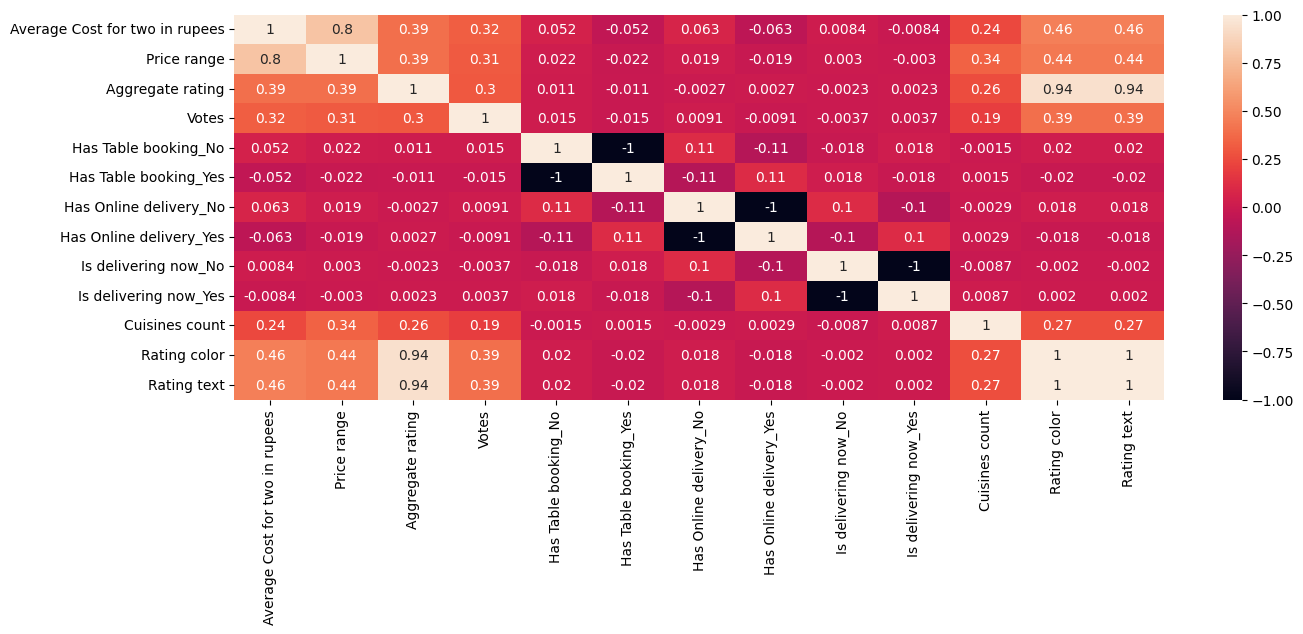

In [32]:
df_temp = df_clean.drop(columns=[
        'Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
        'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency', 
        'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text'], axis=1)

df_temp = pd.concat([df_temp, encoded_df], axis=1)
plt.figure(figsize=(15, 5))
sns.heatmap(df_temp.corr(), annot=True)         

In [33]:
correlations = df_temp.corr()['Aggregate rating'].sort_values(ascending=False)
correlations = correlations[correlations > 0][1:]

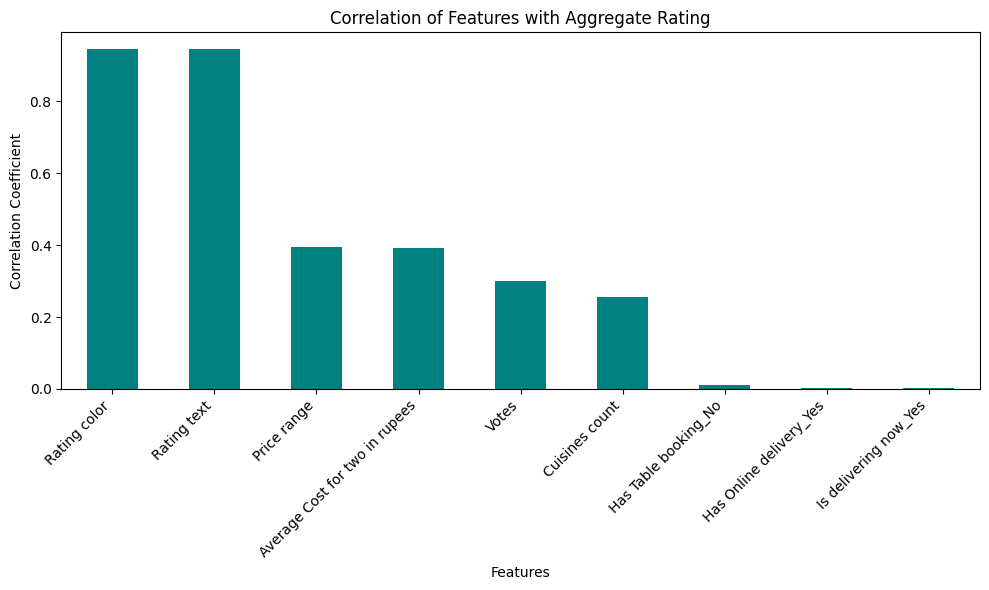

In [34]:
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color="teal")
plt.title('Correlation of Features with Aggregate Rating')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# CONCLUSION: 
### Most Influential feature affecting restaurant ratings:

### 1. `Rating color`### 2. `Rating text`
### 3. `Votes`
### 4. `Average Cost for two in rupees`
### 5. `Cuisines count`

- Note: `Rating color` and `Rating text` are nearly same and one of them can be ignored